# 作業:
    請嘗試改用CIFAR100

# Import Library

In [1]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

Using TensorFlow backend.


# 資料準備

In [2]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data()

In [3]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [4]:
x_img_train.shape

(50000, 32, 32, 3)

In [5]:
y_label_train.shape

(50000, 1)

In [6]:
x_img_test.shape

(10000, 32, 32, 3)

In [7]:
x_img_test[0]

array([[[199, 215, 249],
        [196, 211, 244],
        [195, 210, 243],
        ...,
        [216, 231, 250],
        [217, 231, 250],
        [224, 234, 252]],

       [[197, 210, 239],
        [195, 208, 238],
        [195, 210, 240],
        ...,
        [231, 243, 250],
        [233, 243, 250],
        [241, 245, 253]],

       [[222, 226, 246],
        [213, 220, 242],
        [209, 219, 243],
        ...,
        [243, 250, 251],
        [244, 249, 251],
        [250, 250, 253]],

       ...,

       [[ 72,  73,  99],
        [ 71,  74, 102],
        [ 74,  78, 108],
        ...,
        [220, 208, 217],
        [183, 168, 181],
        [155, 141, 150]],

       [[ 72,  75, 104],
        [ 76,  81, 111],
        [ 84,  89, 122],
        ...,
        [222, 212, 220],
        [187, 174, 192],
        [145, 132, 149]],

       [[ 80,  85, 118],
        [ 84,  90, 123],
        [ 85,  92, 127],
        ...,
        [217, 207, 215],
        [207, 194, 211],
        [176, 164, 183]]

In [8]:
y_label_test.shape

(10000, 1)

In [9]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}
label_dict = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 
    'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 
    'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 
    'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 
    'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion',
    'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse',
    'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear',
    'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine',
    'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
    'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake',
    'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table',
    'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout',
    'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman',
    'worm'
]

In [10]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(100, 100)
#     if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(20,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=25) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

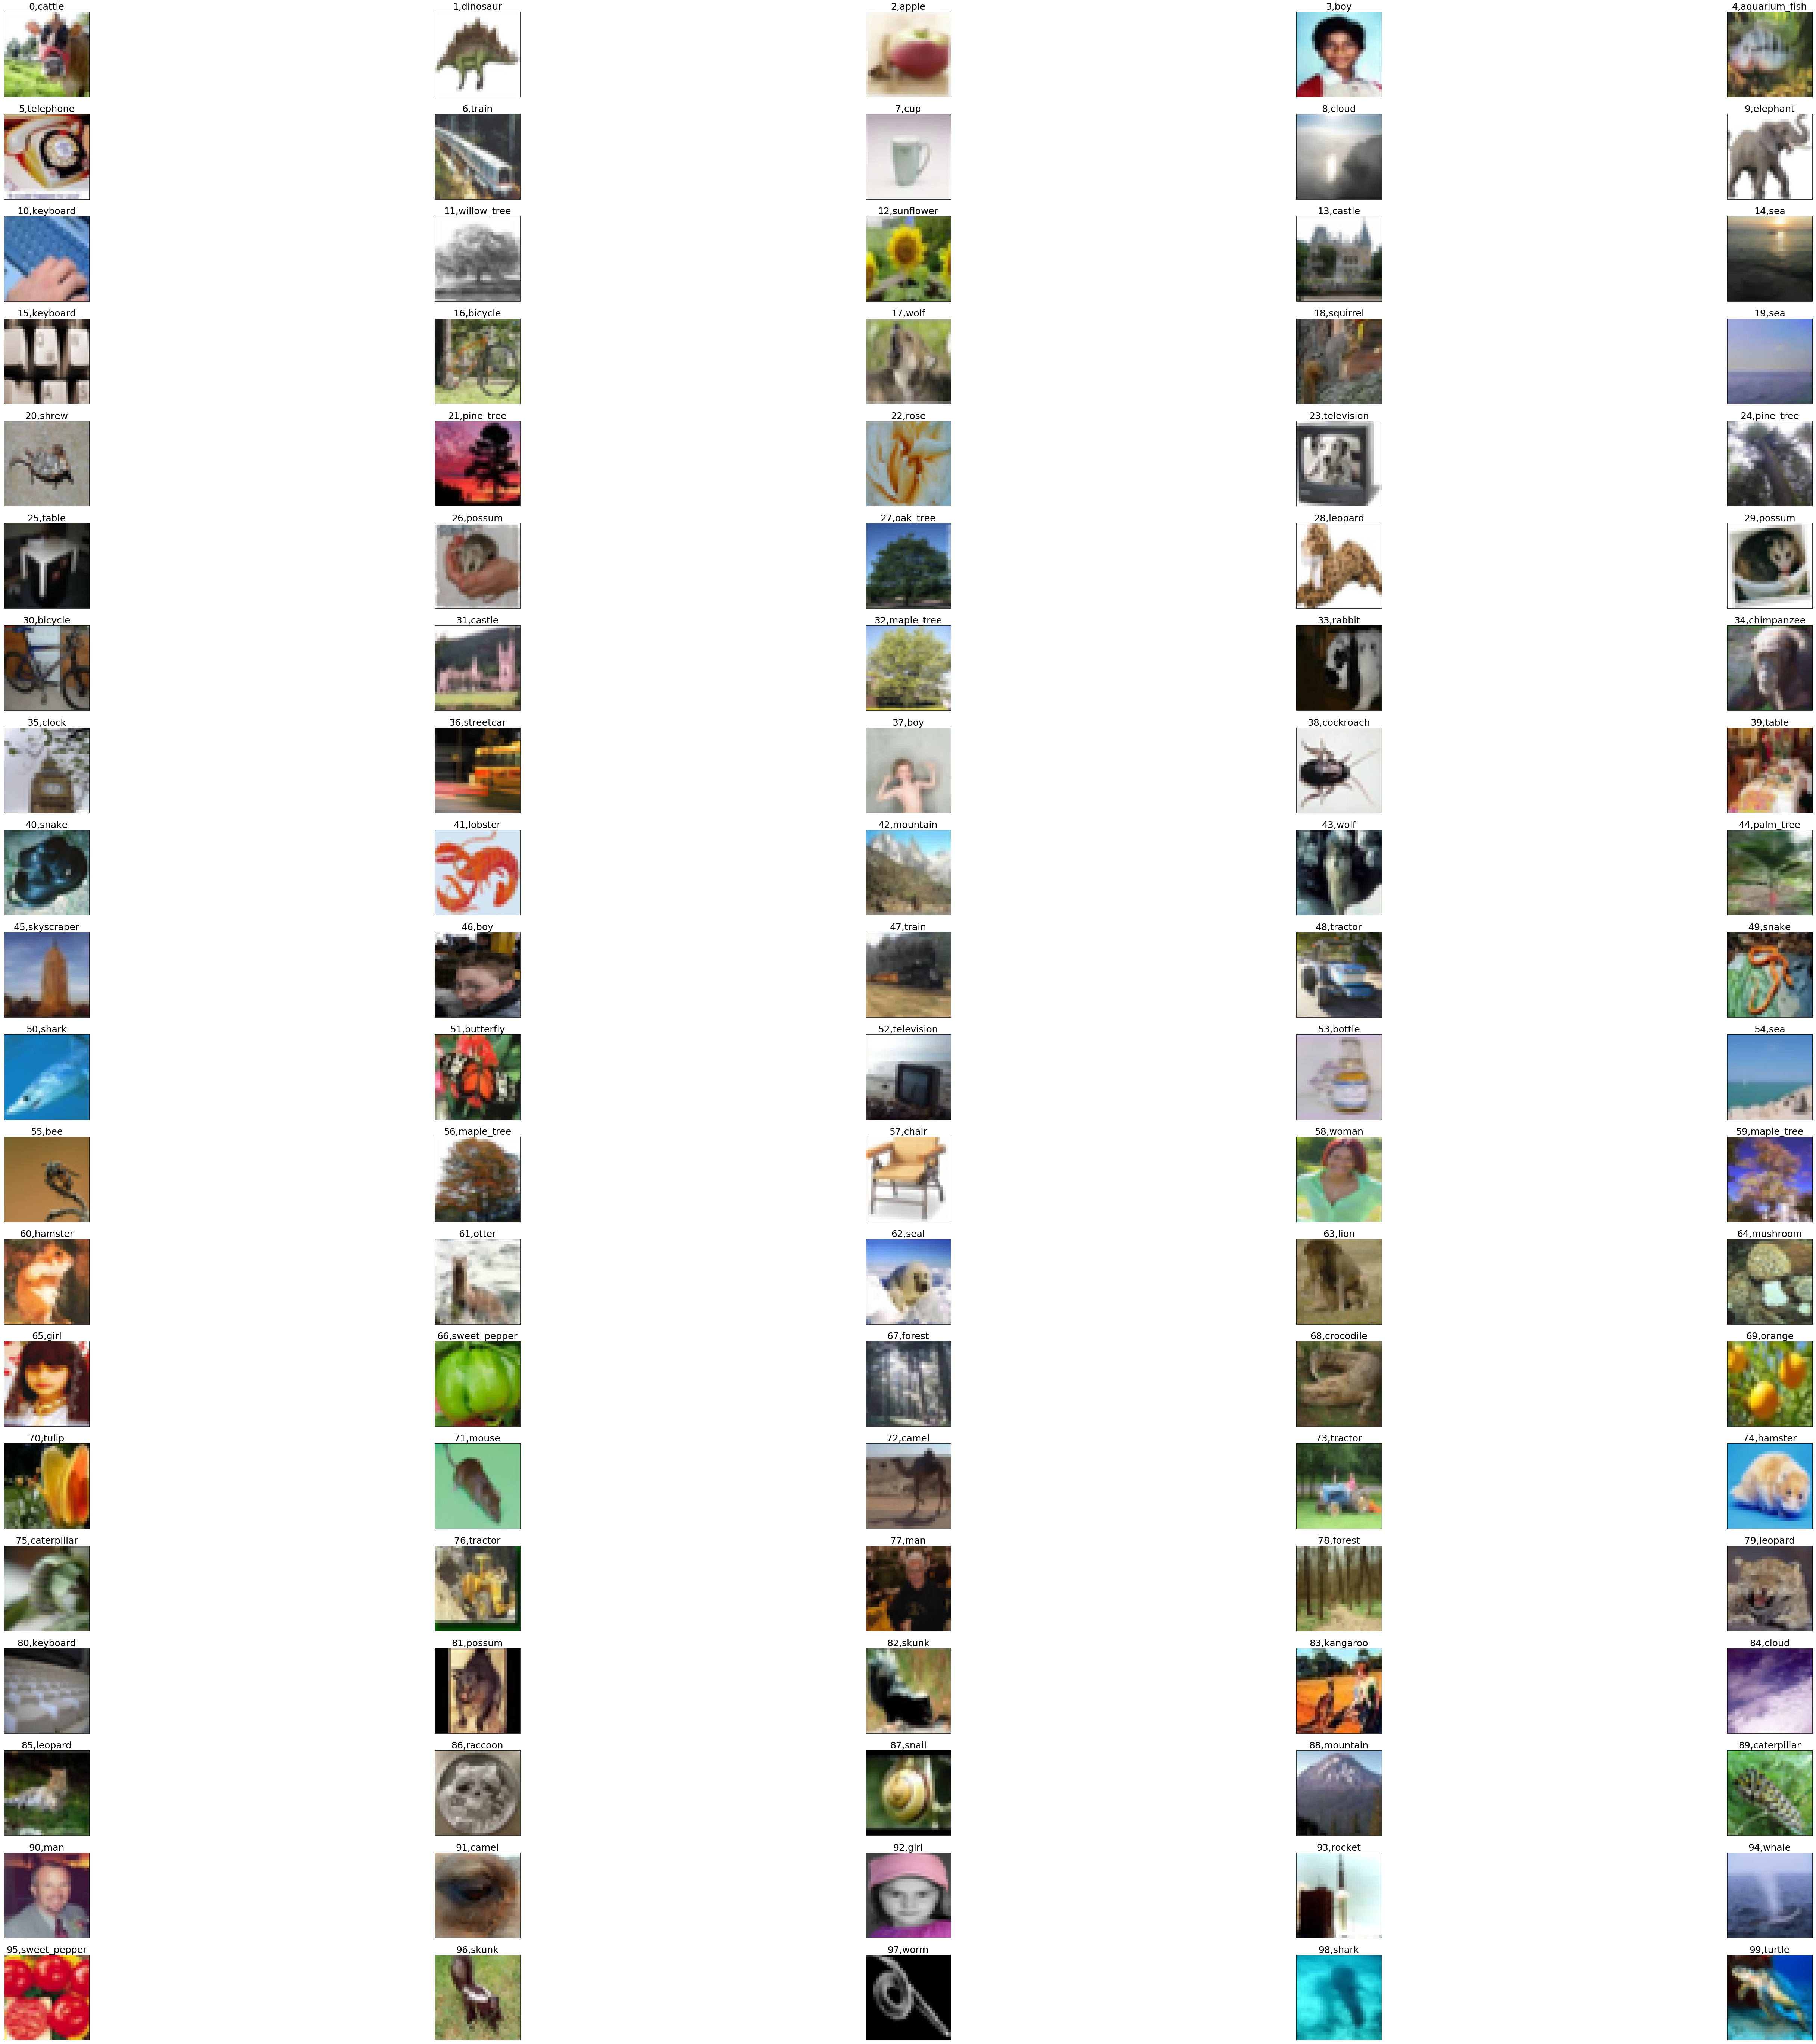

In [11]:
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

In [12]:
print('x_img_test:',x_img_test.shape)
print('y_label_test :',y_label_test.shape)

x_img_test: (10000, 32, 32, 3)
y_label_test : (10000, 1)


# Image normalize 

In [13]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [14]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [15]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [16]:
y_label_train.shape

(50000, 1)

In [17]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [18]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [19]:
y_label_train_OneHot.shape

(50000, 100)

In [20]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.